In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import lightgbm

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier


In [17]:
# set options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [18]:
# 예측한 값으로 성능을 평가하는 함수
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred) # 오차 행렬
    accuracy = accuracy_score(y_test, pred) # 정확도
    precision = precision_score(y_test, pred) # 정밀도
    recall = recall_score(y_test, pred) # 재현율
    f1 = f1_score(y_test, pred) # F1
    roc_auc = roc_auc_score(y_test, pred_proba) # ROC-AUC
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

---

### Test 1

In [3]:
vote_df = pd.read_csv("C:\\Users\\eunseo\\Desktop\\Git\\AI-project\\data\\train.csv", encoding="utf-8")
# 인덱스 제거
vote_df.drop("index", axis=1, inplace=True)

In [13]:
# 레이블 인코딩
encoder = LabelEncoder()
encoder.fit(vote_df['age_group'])
labels = encoder.transform(vote_df['age_group'])
vote_df['age_group'] = labels

def get_categoty_age(age_num):
    num = age_num;
    if age_num == 0: num =7

    return num
vote_df["age_group"] = vote_df["age_group"].apply(lambda x : get_categoty_age(x))

#원핫인코딩 진행
def dummy_data(data, columns) :
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data

dummy_columns = ['engnat', 'gender','hand', 'married', 'race', 'religion', 'urban']
vote_df = dummy_data(vote_df, dummy_columns)

# 학습
y_labels = vote_df.loc[:,'voted']
X_features = vote_df.drop('voted', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=156)

evals = [(X_test, y_test)]

xgb_model = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, objective="binary:logistic", random_state=156)
xgb_model.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
w_preds = xgb_model.predict(X_test)
w_pred_proba = xgb_model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, w_preds, w_pred_proba)

[0]	validation_0-logloss:0.67447
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.659053
[2]	validation_0-logloss:0.646371
[3]	validation_0-logloss:0.635448
[4]	validation_0-logloss:0.626529
[5]	validation_0-logloss:0.618997
[6]	validation_0-logloss:0.612601
[7]	validation_0-logloss:0.60679
[8]	validation_0-logloss:0.602073
[9]	validation_0-logloss:0.597939
[10]	validation_0-logloss:0.59441
[11]	validation_0-logloss:0.591355
[12]	validation_0-logloss:0.588382
[13]	validation_0-logloss:0.586084
[14]	validation_0-logloss:0.583966
[15]	validation_0-logloss:0.582161
[16]	validation_0-logloss:0.580249
[17]	validation_0-logloss:0.578693
[18]	validation_0-logloss:0.577517
[19]	validation_0-logloss:0.57655
[20]	validation_0-logloss:0.575346
[21]	validation_0-logloss:0.574269
[22]	validation_0-logloss:0.573572
[23]	validation_0-logloss:0.572796
[24]	validation_0-logloss:0.572228
[25]	validation_0-logloss:0.571675
[26]	validation_0-logloss:0.571186


[230]	validation_0-logloss:0.565392
[231]	validation_0-logloss:0.565426
[232]	validation_0-logloss:0.565449
[233]	validation_0-logloss:0.565548
[234]	validation_0-logloss:0.565531
[235]	validation_0-logloss:0.565557
[236]	validation_0-logloss:0.56558
[237]	validation_0-logloss:0.565608
[238]	validation_0-logloss:0.56567
[239]	validation_0-logloss:0.565674
[240]	validation_0-logloss:0.565717
[241]	validation_0-logloss:0.565686
[242]	validation_0-logloss:0.565737
[243]	validation_0-logloss:0.565832
[244]	validation_0-logloss:0.565861
[245]	validation_0-logloss:0.565831
[246]	validation_0-logloss:0.565858
[247]	validation_0-logloss:0.56581
Stopping. Best iteration:
[147]	validation_0-logloss:0.564767

오차 행렬
[[2583 1433]
 [ 838 2431]]
정확도: 0.6883, 정밀도: 0.6291, 재현율: 0.7437, F1: 0.6816, AUC:0.7594


---

### Test2

In [3]:
vote_df = pd.read_csv("C:\\Users\\eunseo\\Desktop\\Git\\AI-project\\data\\train.csv", encoding="utf-8")
# 인덱스 제거
vote_df.drop("index", axis=1, inplace=True)

In [104]:
# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['education', 'engnat', 'hand', 'urban']

# tp 추가
for i in range(1, 11):
    s = 'tp' + chr(48+(i//10)) + chr(48+(i%10))
    zero_features.append(s)
    
# zero_features 리스트 내부에 저장된 개별 피처들에 대해 0값을 평균 값으로 대체
vote_df[zero_features] = vote_df[zero_features].replace(0, vote_df[zero_features].mean())

In [105]:
### 데이터 정규화(스케일링), oversampling 적용 O
### F1 = 0.7021

# 레이블 인코딩
encoder = LabelEncoder()
encoder.fit(vote_df['age_group'])
labels = encoder.transform(vote_df['age_group'])
vote_df['age_group'] = labels

def get_categoty_age(age_num):
    num = age_num;
    if age_num == 0: num =7

    return num
vote_df["age_group"] = vote_df["age_group"].apply(lambda x : get_categoty_age(x))

#원핫인코딩 진행
def dummy_data(data, columns) :
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data

dummy_columns = ['engnat', 'gender','hand', 'married', 'race', 'religion', 'urban']
vote_df = dummy_data(vote_df, dummy_columns)

# feature 분리 및 학습세트/평가세트 분리
y_labels = vote_df.loc[:,'voted']
X_features = vote_df.drop('voted', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=156)


# 데이터 정규화(스케일링)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# oversampling
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=156)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)


# 학습
evals = [(X_test, y_test)]
xgb_model = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, objective="binary:logistic", random_state=156)
xgb_model.fit(X_train_over, y_train_over, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
w_preds = xgb_model.predict(X_test)
w_pred_proba = xgb_model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, w_preds, w_pred_proba)

[0]	validation_0-logloss:0.674497
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.659213
[2]	validation_0-logloss:0.646513
[3]	validation_0-logloss:0.636014
[4]	validation_0-logloss:0.627398
[5]	validation_0-logloss:0.620145
[6]	validation_0-logloss:0.613889
[7]	validation_0-logloss:0.608606
[8]	validation_0-logloss:0.604155
[9]	validation_0-logloss:0.600126
[10]	validation_0-logloss:0.596753
[11]	validation_0-logloss:0.593922
[12]	validation_0-logloss:0.591267
[13]	validation_0-logloss:0.589005
[14]	validation_0-logloss:0.587062
[15]	validation_0-logloss:0.585415
[16]	validation_0-logloss:0.584003
[17]	validation_0-logloss:0.582806
[18]	validation_0-logloss:0.581626
[19]	validation_0-logloss:0.580774
[20]	validation_0-logloss:0.579874
[21]	validation_0-logloss:0.578797
[22]	validation_0-logloss:0.578125
[23]	validation_0-logloss:0.577579
[24]	validation_0-logloss:0.577039
[25]	validation_0-logloss:0.576327
[26]	validation_0-logloss:0.575

In [84]:
### 데이터 정규화(스케일링), oversampling 적용 X

# 레이블 인코딩
encoder = LabelEncoder()
encoder.fit(vote_df['age_group'])
labels = encoder.transform(vote_df['age_group'])
vote_df['age_group'] = labels

def get_categoty_age(age_num):
    num = age_num;
    if age_num == 0: num =7

    return num
vote_df["age_group"] = vote_df["age_group"].apply(lambda x : get_categoty_age(x))

#원핫인코딩 진행
def dummy_data(data, columns) :
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data

dummy_columns = ['engnat', 'gender','hand', 'married', 'race', 'religion', 'urban']
vote_df = dummy_data(vote_df, dummy_columns)

# 학습
y_labels = vote_df.loc[:,'voted']
X_features = vote_df.drop('voted', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=156)

evals = [(X_test, y_test)]

xgb_model = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, objective="binary:logistic", random_state=156)
xgb_model.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
w_preds = xgb_model.predict(X_test)
w_pred_proba = xgb_model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, w_preds, w_pred_proba)

[0]	validation_0-logloss:0.674494
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.659088
[2]	validation_0-logloss:0.64642
[3]	validation_0-logloss:0.635507
[4]	validation_0-logloss:0.626604
[5]	validation_0-logloss:0.619082
[6]	validation_0-logloss:0.61267
[7]	validation_0-logloss:0.606871
[8]	validation_0-logloss:0.60211
[9]	validation_0-logloss:0.598009
[10]	validation_0-logloss:0.594357
[11]	validation_0-logloss:0.591303
[12]	validation_0-logloss:0.58841
[13]	validation_0-logloss:0.586112
[14]	validation_0-logloss:0.583863
[15]	validation_0-logloss:0.5819
[16]	validation_0-logloss:0.580318
[17]	validation_0-logloss:0.579001
[18]	validation_0-logloss:0.577724
[19]	validation_0-logloss:0.576646
[20]	validation_0-logloss:0.575793
[21]	validation_0-logloss:0.574972
[22]	validation_0-logloss:0.574211
[23]	validation_0-logloss:0.573586
[24]	validation_0-logloss:0.572905
[25]	validation_0-logloss:0.572313
[26]	validation_0-logloss:0.571887
[2

### Test2.1 (05/28)

In [19]:
vote_df = pd.read_csv("C:\\Users\\eunseo\\Desktop\\Git\\AI-project\\data\\train.csv", encoding="utf-8")
# 인덱스 제거
vote_df.drop("index", axis=1, inplace=True)

# 0값을 검사할 피처명 리스트 객체 설정
# zero_features = ['education', 'engnat', 'hand', 'urban']
# education 비율 맞추기?
zero_features = []

# tp 추가
for i in range(1, 11):
    s = 'tp' + chr(48+(i//10)) + chr(48+(i%10))
    zero_features.append(s)
    
# zero_features 리스트 내부에 저장된 개별 피처들에 대해 0값을 평균 값으로 대체
vote_df[zero_features] = vote_df[zero_features].replace(0, vote_df[zero_features].mean())

In [20]:
# 레이블 인코딩
encoder = LabelEncoder()
encoder.fit(vote_df['age_group'])
labels = encoder.transform(vote_df['age_group'])
vote_df['age_group'] = labels

def get_categoty_age(age_num):
    num = age_num;
    if age_num == 0: num =7

    return num
vote_df["age_group"] = vote_df["age_group"].apply(lambda x : get_categoty_age(x))

#원핫인코딩 진행
def dummy_data(data, columns) :
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data

dummy_columns = ['engnat', 'gender','hand', 'married', 'race', 'religion', 'urban']
# wr 추가
for i in range(1, 14):
    s = 'wr_' + chr(48+(i//10)) + chr(48+(i%10))
    dummy_columns.append(s)
# wf 추가
for i in range(1, 4):
    s = 'wf_' + chr(48+(i//10)) + chr(48+(i%10))
    dummy_columns.append(s)
print(dummy_columns)

vote_df = dummy_data(vote_df, dummy_columns)


['engnat', 'gender', 'hand', 'married', 'race', 'religion', 'urban', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13', 'wf_01', 'wf_02', 'wf_03']


<AxesSubplot:>

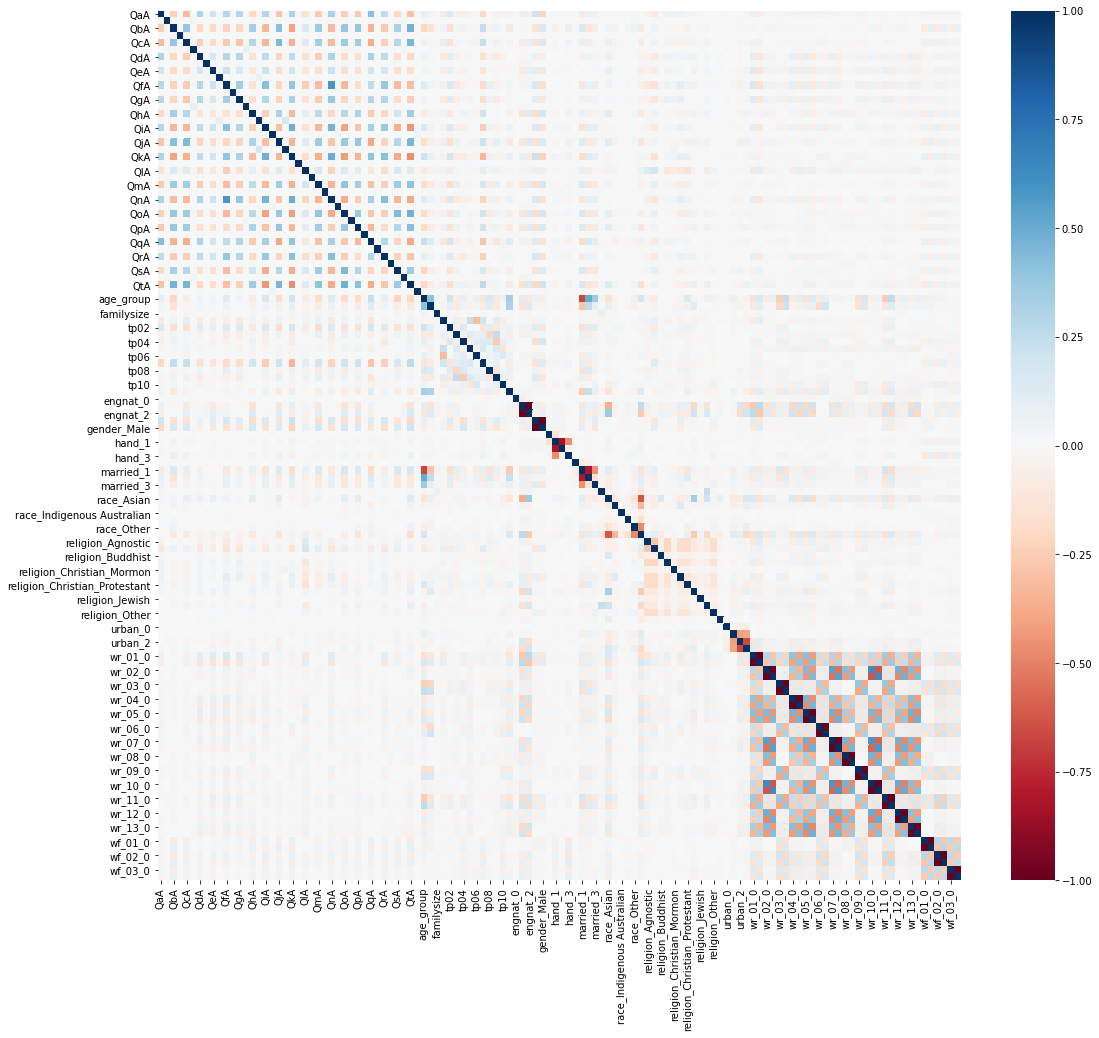

In [21]:
# 이상값 처리
import seaborn as sns

plt.figure(figsize=(18, 16))
corr = vote_df.corr()
sns.heatmap(corr, cmap="RdBu")

In [23]:
# 시간 데이터 전처리 - 정확도 0.85 -> 0.94로 증가함 하지만 StandardScaler로 전처리는 의미가 없을 걸로 보임...

#Q_E 시간
Q_E = []
for i in range(97, 117):
    a = 'Q' + chr(i) + 'E'
    Q_E.append(a)

def get_categoty_time(Q_time):
    cat = 0
    if Q_time <= 1000 : cat = 1
    elif Q_time <= 2000 : cat = 2
    elif Q_time <= 3000 : cat = 3
    elif Q_time <= 4000 : cat = 4
    elif Q_time <= 5000 : cat = 5
    elif Q_time <= 6000 : cat = 6
    elif Q_time <= 7000 : cat = 7
    elif Q_time <= 8000 : cat = 8
    elif Q_time <= 9000 : cat = 9
    elif Q_time <=10000 : cat = 10
    elif Q_time <=15000 : cat = 11
    elif Q_time <=20000 : cat = 12
    else : Q_time = 13

    return cat

for Q_time in Q_E:
    vote_df[Q_time] = vote_df[Q_time].apply(lambda x : get_categoty_time(x))


In [24]:
def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함
    fraud = df[df["voted"]==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함.
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값보다 크거나, 최소값보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

for col in vote_df.columns.values.tolist():
    outlier_index = get_outlier(df=vote_df, column=col, weight=1.5)
    print(col, " / ", len(outlier_index))

QaA  /  0
QaE  /  3118
QbA  /  0
QbE  /  1584
QcA  /  0
QcE  /  832
QdA  /  1418
QdE  /  841
QeA  /  0
QeE  /  1189
QfA  /  0
QfE  /  541
QgA  /  0
QgE  /  592
QhA  /  0
QhE  /  1014
QiA  /  0
QiE  /  2106
QjA  /  0
QjE  /  1757
QkA  /  0
QkE  /  1244
QlA  /  1685
QlE  /  1127
QmA  /  0
QmE  /  883
QnA  /  0
QnE  /  3448
QoA  /  0
QoE  /  760
QpA  /  0
QpE  /  821
QqA  /  0
QqE  /  416
QrA  /  0
QrE  /  1346
QsA  /  0
QsE  /  671
QtA  /  0
QtE  /  1141
age_group  /  0
education  /  202
familysize  /  1819
tp01  /  0
tp02  /  0
tp03  /  2552
tp04  /  0
tp05  /  1580
tp06  /  0
tp07  /  109
tp08  /  0
tp09  /  0
tp10  /  0
voted  /  0
engnat_0  /  25
engnat_1  /  0
engnat_2  /  0
gender_Female  /  0
gender_Male  /  0
hand_0  /  50
hand_1  /  2317
hand_2  /  1745
hand_3  /  522
married_0  /  23
married_1  /  0
married_2  /  0
married_3  /  1771
race_Arab  /  79
race_Asian  /  1626
race_Black  /  689
race_Indigenous Australian  /  15
race_Native American  /  179
race_Other  /  1304
race_Wh

In [25]:
# race_White, religion_Agnostic  religion_Atheist  

outlier_index = get_outlier(df=vote_df, column="race_White", weight=1.5)
vote_df.drop(outlier_index, axis=0, inplace=True)

outlier_index = get_outlier(df=vote_df, column="religion_Agnostic", weight=1.5)
vote_df.drop(outlier_index, axis=0, inplace=True)

outlier_index = get_outlier(df=vote_df, column="religion_Atheist", weight=1.5)
vote_df.drop(outlier_index, axis=0, inplace=True)

In [26]:
# feature 분리 및 학습세트/평가세트 분리
y_labels = vote_df.loc[:,'voted']
X_features = vote_df.drop('voted', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=156)

# 데이터 정규화(스케일링)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# oversampling
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=156)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

# 학습
evals = [(X_test, y_test)]
xgb_model = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, objective="binary:logistic", random_state=156)
xgb_model.fit(X_train_over, y_train_over, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
w_preds = xgb_model.predict(X_test)
w_pred_proba = xgb_model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, w_preds, w_pred_proba)

[0]	validation_0-logloss:0.647259
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.610282
[2]	validation_0-logloss:0.580379
[3]	validation_0-logloss:0.555757
[4]	validation_0-logloss:0.535254
[5]	validation_0-logloss:0.518077
[6]	validation_0-logloss:0.503653
[7]	validation_0-logloss:0.491128
[8]	validation_0-logloss:0.480549
[9]	validation_0-logloss:0.470568
[10]	validation_0-logloss:0.46237
[11]	validation_0-logloss:0.455412
[12]	validation_0-logloss:0.448696
[13]	validation_0-logloss:0.443407
[14]	validation_0-logloss:0.438326
[15]	validation_0-logloss:0.43429
[16]	validation_0-logloss:0.430607
[17]	validation_0-logloss:0.427163
[18]	validation_0-logloss:0.424251
[19]	validation_0-logloss:0.421567
[20]	validation_0-logloss:0.419257
[21]	validation_0-logloss:0.417242
[22]	validation_0-logloss:0.415319
[23]	validation_0-logloss:0.413701
[24]	validation_0-logloss:0.412273
[25]	validation_0-logloss:0.410552
[26]	validation_0-logloss:0.40929

[230]	validation_0-logloss:0.387817
[231]	validation_0-logloss:0.387781
[232]	validation_0-logloss:0.387822
[233]	validation_0-logloss:0.387861
[234]	validation_0-logloss:0.387867
[235]	validation_0-logloss:0.387848
[236]	validation_0-logloss:0.387827
[237]	validation_0-logloss:0.387844
[238]	validation_0-logloss:0.387865
[239]	validation_0-logloss:0.387847
[240]	validation_0-logloss:0.387844
[241]	validation_0-logloss:0.387878
[242]	validation_0-logloss:0.387876
[243]	validation_0-logloss:0.387844
[244]	validation_0-logloss:0.387818
[245]	validation_0-logloss:0.387865
[246]	validation_0-logloss:0.387822
[247]	validation_0-logloss:0.387793
[248]	validation_0-logloss:0.387739
[249]	validation_0-logloss:0.387774
[250]	validation_0-logloss:0.387704
[251]	validation_0-logloss:0.387693
[252]	validation_0-logloss:0.387717
[253]	validation_0-logloss:0.387732
[254]	validation_0-logloss:0.387724
[255]	validation_0-logloss:0.387717
[256]	validation_0-logloss:0.387665
[257]	validation_0-logloss:0

### K-fold 시도중

In [86]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# feature 분리 및 학습세트/평가세트 분리
y_labels = vote_df.loc[:,'voted']
X_features = vote_df.drop('voted', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=156)

# 데이터 정규화(스케일링)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# oversampling
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=156)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

# 학습
evals = [(X_test, y_test)]
xgb_model = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, objective="binary:logistic", random_state=156)


# K-Fold
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=0)
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, " model 시작 ")
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        print("\t 폴드 세트: ", folder_counter, " 시작 ")
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]        
        X_te = X_train_n[valid_index]        
        
        model.fit(X_tr, y_tr)
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
        test_pred[:, folder_counter] = model.predict(X_test_n)
        
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)
    return train_fold_pred, test_pred_mean

xgb_train, xgb_test = get_stacking_base_datasets(xgb_model, X_train_over, y_train_over, X_test, 7)

xgb_model.fit(xgb_train, y_train_over, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
w_preds = xgb_model.predict(xgb_test)
w_pred_proba = xgb_model.predict_proba(xgb_test)[:,1]
print()
get_clf_eval(y_test, w_preds, w_pred_proba)

XGBClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


ValueError: feature_names mismatch: ['f0'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120']
training data did not have the following fields: f14, f77, f6, f12, f65, f28, f79, f66, f112, f46, f89, f96, f101, f17, f27, f57, f82, f93, f81, f41, f13, f38, f23, f24, f67, f5, f58, f53, f55, f102, f44, f59, f60, f63, f26, f69, f39, f37, f51, f99, f98, f73, f80, f97, f94, f95, f32, f31, f20, f56, f106, f48, f88, f18, f19, f64, f108, f90, f103, f111, f113, f114, f68, f117, f61, f4, f105, f78, f86, f70, f76, f91, f15, f62, f100, f36, f40, f29, f87, f107, f34, f42, f74, f3, f11, f8, f49, f50, f33, f7, f54, f9, f47, f104, f52, f72, f85, f25, f120, f92, f118, f1, f10, f83, f16, f119, f110, f22, f75, f115, f21, f43, f84, f71, f2, f109, f45, f35, f116, f30

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# feature 분리 및 학습세트/평가세트 분리
y_labels = vote_df.loc[:,'voted']
X_features = vote_df.drop('voted', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=156)

# 데이터 정규화(스케일링)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# oversampling
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=156)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

# 학습
evals = [(X_test, y_test)]
xgb_model = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, objective="binary:logistic", random_state=156)

Kfold = KFold(n_splits=3, shuffle=True, random_state=156)
n_iter = 0
score = cross_val_score(xgb_model, )



---

### Test3

In [93]:
vote_df = pd.read_csv("C:\\Users\\eunseo\\Desktop\\Git\\AI-project\\data\\train.csv", encoding="utf-8")
# 인덱스 제거
vote_df.drop("index", axis=1, inplace=True)

In [94]:
# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['education', 'engnat', 'hand', 'urban']

# tp 추가
for i in range(1, 11):
    s = 'tp' + chr(48+(i//10)) + chr(48+(i%10))
    zero_features.append(s)
    
# zero_features 리스트 내부에 저장된 개별 피처들에 대해 0값을 평균 값으로 대체
vote_df[zero_features] = vote_df[zero_features].replace(0, vote_df[zero_features].mean())

In [95]:
### 이상값 처리 ###

Q_E = []
#Q_E 시간
for i in range(97, 117):
    a = 'Q' + chr(i) + 'E'
    Q_E.append(a)
    
# # 시간 데이터 전처리 - 정확도 0.85 -> 0.94로 증가함 하지만 StandardScaler로 전처리는 의미가 없을 걸로 보임...
# def get_categoty_time(Q_time):
#     cat = 0
#     if Q_time <= 1000 : cat = 1
#     elif Q_time <= 2000 : cat = 2
#     elif Q_time <= 3000 : cat = 3
#     elif Q_time <= 4000 : cat = 4
#     elif Q_time <= 5000 : cat = 5
#     elif Q_time <= 6000 : cat = 6
#     elif Q_time <= 7000 : cat = 7
#     elif Q_time <= 8000 : cat = 8
#     elif Q_time <= 9000 : cat = 9
#     elif Q_time <=10000 : cat = 10
#     elif Q_time <=15000 : cat = 11
#     elif Q_time <=20000 : cat = 12
#     else : Q_time = 13

#     return cat


# for Q_time in Q_E:
#     vote_df[Q_time] = vote_df[Q_time].apply(lambda x : get_categoty_time(x))

    
#시간에 대해 이상치 데이터 인덱스 확인 및 제거
def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['voted']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index    
    return outlier_index

for feature in Q_E:
    outlier_index = get_outlier(df=vote_df, column=feature, weight=1.5)
    vote_df.drop(outlier_index, axis=0, inplace=True)

In [96]:
# 레이블 인코딩
encoder = LabelEncoder()
encoder.fit(vote_df['age_group'])
labels = encoder.transform(vote_df['age_group'])
vote_df['age_group'] = labels

def get_categoty_age(age_num):
    num = age_num;
    if age_num == 0: num =7

    return num
vote_df["age_group"] = vote_df["age_group"].apply(lambda x : get_categoty_age(x))

#원핫인코딩 진행
def dummy_data(data, columns) :
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data

dummy_columns = ['engnat', 'gender','hand', 'married', 'race', 'religion', 'urban']
vote_df = dummy_data(vote_df, dummy_columns)

# 학습
y_labels = vote_df.loc[:,'voted']
X_features = vote_df.drop('voted', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=156)

evals = [(X_test, y_test)]

xgb_model = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, objective="binary:logistic", random_state=156)
xgb_model.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
w_preds = xgb_model.predict(X_test)
w_pred_proba = xgb_model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, w_preds, w_pred_proba)

[0]	validation_0-logloss:0.646548
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.608295
[2]	validation_0-logloss:0.576392
[3]	validation_0-logloss:0.549345
[4]	validation_0-logloss:0.526573
[5]	validation_0-logloss:0.506446
[6]	validation_0-logloss:0.489433
[7]	validation_0-logloss:0.474256
[8]	validation_0-logloss:0.461322
[9]	validation_0-logloss:0.449719
[10]	validation_0-logloss:0.439205
[11]	validation_0-logloss:0.429957
[12]	validation_0-logloss:0.422025
[13]	validation_0-logloss:0.41465
[14]	validation_0-logloss:0.408213
[15]	validation_0-logloss:0.40265
[16]	validation_0-logloss:0.397336
[17]	validation_0-logloss:0.392314
[18]	validation_0-logloss:0.387684
[19]	validation_0-logloss:0.383511
[20]	validation_0-logloss:0.379572
[21]	validation_0-logloss:0.375675
[22]	validation_0-logloss:0.372087
[23]	validation_0-logloss:0.368739
[24]	validation_0-logloss:0.365456
[25]	validation_0-logloss:0.362438
[26]	validation_0-logloss:0.35947

[230]	validation_0-logloss:0.252882
[231]	validation_0-logloss:0.252811
[232]	validation_0-logloss:0.252805
[233]	validation_0-logloss:0.252724
[234]	validation_0-logloss:0.252763
[235]	validation_0-logloss:0.252741
[236]	validation_0-logloss:0.252771
[237]	validation_0-logloss:0.252746
[238]	validation_0-logloss:0.252721
[239]	validation_0-logloss:0.25265
[240]	validation_0-logloss:0.252611
[241]	validation_0-logloss:0.252527
[242]	validation_0-logloss:0.25248
[243]	validation_0-logloss:0.252419
[244]	validation_0-logloss:0.252413
[245]	validation_0-logloss:0.252357
[246]	validation_0-logloss:0.252372
[247]	validation_0-logloss:0.252278
[248]	validation_0-logloss:0.252238
[249]	validation_0-logloss:0.252211
[250]	validation_0-logloss:0.252209
[251]	validation_0-logloss:0.252237
[252]	validation_0-logloss:0.252363
[253]	validation_0-logloss:0.252292
[254]	validation_0-logloss:0.252297
[255]	validation_0-logloss:0.252242
[256]	validation_0-logloss:0.252156
[257]	validation_0-logloss:0.2

In [88]:
### 이상값 처리 주석 없이 전체 수행 ###

# 레이블 인코딩
encoder = LabelEncoder()
encoder.fit(vote_df['age_group'])
labels = encoder.transform(vote_df['age_group'])
vote_df['age_group'] = labels

def get_categoty_age(age_num):
    num = age_num;
    if age_num == 0: num =7

    return num
vote_df["age_group"] = vote_df["age_group"].apply(lambda x : get_categoty_age(x))

#원핫인코딩 진행
def dummy_data(data, columns) :
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data

dummy_columns = ['engnat', 'gender','hand', 'married', 'race', 'religion', 'urban']
vote_df = dummy_data(vote_df, dummy_columns)

# 학습
y_labels = vote_df.loc[:,'voted']
X_features = vote_df.drop('voted', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=156)

evals = [(X_test, y_test)]

xgb_model = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, objective="binary:logistic", random_state=156)
xgb_model.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
w_preds = xgb_model.predict(X_test)
w_pred_proba = xgb_model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, w_preds, w_pred_proba)

[0]	validation_0-logloss:0.618359
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.557104
[2]	validation_0-logloss:0.50626
[3]	validation_0-logloss:0.463091
[4]	validation_0-logloss:0.426343
[5]	validation_0-logloss:0.394468
[6]	validation_0-logloss:0.367313
[7]	validation_0-logloss:0.34324
[8]	validation_0-logloss:0.32246
[9]	validation_0-logloss:0.303898
[10]	validation_0-logloss:0.287445
[11]	validation_0-logloss:0.273029
[12]	validation_0-logloss:0.260081
[13]	validation_0-logloss:0.248847
[14]	validation_0-logloss:0.238704
[15]	validation_0-logloss:0.229423
[16]	validation_0-logloss:0.221174
[17]	validation_0-logloss:0.213521
[18]	validation_0-logloss:0.206489
[19]	validation_0-logloss:0.200337
[20]	validation_0-logloss:0.194701
[21]	validation_0-logloss:0.189462
[22]	validation_0-logloss:0.184635
[23]	validation_0-logloss:0.180399
[24]	validation_0-logloss:0.176414
[25]	validation_0-logloss:0.172732
[26]	validation_0-logloss:0.16931


[230]	validation_0-logloss:0.099172
[231]	validation_0-logloss:0.099136
[232]	validation_0-logloss:0.099115
[233]	validation_0-logloss:0.09909
[234]	validation_0-logloss:0.099074
[235]	validation_0-logloss:0.099096
[236]	validation_0-logloss:0.099081
[237]	validation_0-logloss:0.099035
[238]	validation_0-logloss:0.099014
[239]	validation_0-logloss:0.09898
[240]	validation_0-logloss:0.098947
[241]	validation_0-logloss:0.098885
[242]	validation_0-logloss:0.098853
[243]	validation_0-logloss:0.098879
[244]	validation_0-logloss:0.098832
[245]	validation_0-logloss:0.098806
[246]	validation_0-logloss:0.098785
[247]	validation_0-logloss:0.098751
[248]	validation_0-logloss:0.098723
[249]	validation_0-logloss:0.09866
[250]	validation_0-logloss:0.098616
[251]	validation_0-logloss:0.09866
[252]	validation_0-logloss:0.098688
[253]	validation_0-logloss:0.098718
[254]	validation_0-logloss:0.098696
[255]	validation_0-logloss:0.09867
[256]	validation_0-logloss:0.09864
[257]	validation_0-logloss:0.09861

---

### Test4

In [78]:
vote_df = pd.read_csv("C:\\Users\\eunseo\\Desktop\\Git\\AI-project\\data\\train.csv", encoding="utf-8")
# 인덱스 제거
vote_df.drop("index", axis=1, inplace=True)

In [79]:
# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['education', 'engnat', 'hand', 'urban']

# tp 추가
for i in range(1, 11):
    s = 'tp' + chr(48+(i//10)) + chr(48+(i%10))
    zero_features.append(s)
    
# zero_features 리스트 내부에 저장된 개별 피처들에 대해 0값을 평균 값으로 대체
vote_df[zero_features] = vote_df[zero_features].replace(0, vote_df[zero_features].mean())

In [80]:
### 이상값 처리 ###

Q_E = []
#Q_E 시간
for i in range(97, 117):
    a = 'Q' + chr(i) + 'E'
    Q_E.append(a)
    
# 시간 데이터 전처리 - 정확도 0.85 -> 0.94로 증가함 하지만 StandardScaler로 전처리는 의미가 없을 걸로 보임...
def get_categoty_time(Q_time):
    cat = 0
    if Q_time <= 1000 : cat = 1
    elif Q_time <= 2000 : cat = 2
    elif Q_time <= 3000 : cat = 3
    elif Q_time <= 4000 : cat = 4
    elif Q_time <= 5000 : cat = 5
    elif Q_time <= 6000 : cat = 6
    elif Q_time <= 7000 : cat = 7
    elif Q_time <= 8000 : cat = 8
    elif Q_time <= 9000 : cat = 9
    elif Q_time <=10000 : cat = 10
    elif Q_time <=15000 : cat = 11
    elif Q_time <=20000 : cat = 12
    else : Q_time = 13

    return cat


for Q_time in Q_E:
    vote_df[Q_time] = vote_df[Q_time].apply(lambda x : get_categoty_time(x))

    
#시간에 대해 이상치 데이터 인덱스 확인 및 제거
def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['voted']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index    
    return outlier_index

for feature in Q_E:
    outlier_index = get_outlier(df=vote_df, column=feature, weight=1.5)
    vote_df.drop(outlier_index, axis=0, inplace=True)

In [81]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# 레이블 인코딩
encoder = LabelEncoder()
encoder.fit(vote_df['age_group'])
labels = encoder.transform(vote_df['age_group'])
vote_df['age_group'] = labels

def get_categoty_age(age_num):
    num = age_num;
    if age_num == 0: num =7

    return num
vote_df["age_group"] = vote_df["age_group"].apply(lambda x : get_categoty_age(x))

#원핫인코딩 진행
def dummy_data(data, columns) :
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data

dummy_columns = ['engnat', 'gender','hand', 'married', 'race', 'religion', 'urban']
vote_df = dummy_data(vote_df, dummy_columns)

# feature 분리 및 학습세트/평가세트 분리
y_labels = vote_df.loc[:,'voted']
X_features = vote_df.drop('voted', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=156)

# 데이터 정규화(스케일링)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# oversampling
over_sampler = RandomOverSampler(random_state=156)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

# xgb
evals = [(X_test, y_test)]
xgb_model = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, objective="binary:logistic", random_state=156)
xgb_model.fit(X_train_over, y_train_over, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
w_preds = xgb_model.predict(X_test)
w_pred_proba = xgb_model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, w_preds, w_pred_proba)

[0]	validation_0-logloss:0.637999
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.594277
[2]	validation_0-logloss:0.557667
[3]	validation_0-logloss:0.527481
[4]	validation_0-logloss:0.50139
[5]	validation_0-logloss:0.47879
[6]	validation_0-logloss:0.458949
[7]	validation_0-logloss:0.442041
[8]	validation_0-logloss:0.426978
[9]	validation_0-logloss:0.413631
[10]	validation_0-logloss:0.400678
[11]	validation_0-logloss:0.389489
[12]	validation_0-logloss:0.378708
[13]	validation_0-logloss:0.369227
[14]	validation_0-logloss:0.36115
[15]	validation_0-logloss:0.353296
[16]	validation_0-logloss:0.346312
[17]	validation_0-logloss:0.339228
[18]	validation_0-logloss:0.333139
[19]	validation_0-logloss:0.327132
[20]	validation_0-logloss:0.321617
[21]	validation_0-logloss:0.316406
[22]	validation_0-logloss:0.311591
[23]	validation_0-logloss:0.307742
[24]	validation_0-logloss:0.303431
[25]	validation_0-logloss:0.299559
[26]	validation_0-logloss:0.295806

[230]	validation_0-logloss:0.192031
[231]	validation_0-logloss:0.191965
[232]	validation_0-logloss:0.191935
[233]	validation_0-logloss:0.191833
[234]	validation_0-logloss:0.191832
[235]	validation_0-logloss:0.191697
[236]	validation_0-logloss:0.191434
[237]	validation_0-logloss:0.191405
[238]	validation_0-logloss:0.191336
[239]	validation_0-logloss:0.191313
[240]	validation_0-logloss:0.191232
[241]	validation_0-logloss:0.191236
[242]	validation_0-logloss:0.191265
[243]	validation_0-logloss:0.19124
[244]	validation_0-logloss:0.191194
[245]	validation_0-logloss:0.191132
[246]	validation_0-logloss:0.191114
[247]	validation_0-logloss:0.191121
[248]	validation_0-logloss:0.19109
[249]	validation_0-logloss:0.190963
[250]	validation_0-logloss:0.190896
[251]	validation_0-logloss:0.190881
[252]	validation_0-logloss:0.190839
[253]	validation_0-logloss:0.190738
[254]	validation_0-logloss:0.190721
[255]	validation_0-logloss:0.190696
[256]	validation_0-logloss:0.190644
[257]	validation_0-logloss:0.1

---

### 하이퍼 파라미터 튜닝 (from experiment file)

In [1]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [ ]:
# max_depth 와 min_child_weight 튜닝
param_test1 = {
 'max_depth':range(3,10,3),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, 
                                                  n_estimators=400, 
                                                  max_depth=3, 
                                                  min_child_weight=3, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic', 
                                                  nthread=-1, 
                                                  scale_pos_weight=1,
                                                  random_state=156), 
                        param_grid = param_test1, scoring='f1',n_jobs=-1,iid=False, cv=5, verbose=10)
gsearch1.fit(X_train, y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
# Gamma 튜닝
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, 
                                                  n_estimators=400, 
                                                  max_depth=3,
                                                  min_child_weight=3, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic', 
                                                  thread=-1, 
                                                  scale_pos_weight=1, 
                                                  random_state=156), 
                        param_grid = param_test2, scoring='f1', n_jobs=-1, iid=False, cv=5)
gsearch2.fit(X_train, y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

In [ ]:
# subsample 과 colsample_bytree 튜닝
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, 
                                                  n_estimators=400, 
                                                  max_depth=3,
                                                  min_child_weight=3, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic', 
                                                  thread=-1, 
                                                  scale_pos_weight=1, 
                                                  random_state=156), 
                        param_grid = param_test3, scoring='f1', n_jobs=-1, iid=False, cv=5, verbose=10)
gsearch3.fit(X_train, y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

In [ ]:
# subsample 추가 튜닝
param_test4 = {
 'subsample':[i/100.0 for i in range(40,80)],
}
gsearch4 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, 
                                                  n_estimators=400, 
                                                  max_depth=3,
                                                  min_child_weight=3, 
                                                  gamma=0, 
                                                  reg_alpha=1e-05,
                                                  subsample=0.8, 
                                                  colsample_bytree=0.6,
                                                  objective= 'binary:logistic', 
                                                  thread=-1, 
                                                  scale_pos_weight=1, 
                                                  random_state=156), 
                        param_grid = param_test4, scoring='f1', n_jobs=-1, iid=False, cv=5, verbose=10)
gsearch4.fit(X_train, y_train)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

In [ ]:
# Regularization Parameter 튜닝
param_test5 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, 
                                                  n_estimators=400, 
                                                  max_depth=3,
                                                  min_child_weight=5, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.6,
                                                  objective= 'binary:logistic', 
                                                  thread=-1, 
                                                  scale_pos_weight=1,
                                                  random_state=156), 
                        param_grid = param_test5, scoring='f1', n_jobs=-1, iid=False, cv=5, verbose=10)
gsearch5.fit(X_train, y_train)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_